# Megaline Telecom Project

This project will include an investigation on which of the Megaline telecom company pre paid plans brings in more revenue.

The goal of this projct is to learn more about the users of both plans, their call usage, data usage and test usage in order to adjust the company's advertising budget to better fit the clients needs. 

This project will include a dataset of 500 Megaline clients in the year 2018. 

<b> Analysis outline: </b>

Assessed the data, and made decisions about dealing with missing values.

Calculated the revanue from the usage data we have. 

Performed EDA, plotted histograms and calculated the variances.
Performed hypothesis testing to learn about the differences in revanues for different groups of clients.

Made recommendations backed by statistics for users preferences and what the pre plan should include. 

## Data overview

In [1]:
!pip install seaborn -U

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
from scipy import stats

In [3]:
# read the datasetes
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
mess = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

In [4]:
#take a look at each table and learn what it includes
print('----------------------------------------Calls Data--------------------------------------')
display(calls.head())
print('----------------------------------------Internet Data-----------------------------------')
display(internet.head())
print('----------------------------------------Messages Data-----------------------------------')
display(mess.head())
print('-----------------------------------------Plans Data-------------------------------------')
display(plans.head())
print('-----------------------------------------Users Data-------------------------------------')
display(users.head())

----------------------------------------Calls Data--------------------------------------


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


----------------------------------------Internet Data-----------------------------------


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


----------------------------------------Messages Data-----------------------------------


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


-----------------------------------------Plans Data-------------------------------------


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


-----------------------------------------Users Data-------------------------------------


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [5]:
#looking into data types
print('----------------------------------------Calls Data info--------------------------------------------------')
display(calls.info())
print('----------------------------------------Internet Data info------------------------------------------------------------')
display(internet.info())
print('----------------------------------------Messages Data info---------------------------------------------------------')
display(mess.info())
print('-----------------------------------------Plans Data info----------------------------------------------------------')
display(plans.info())
print('-----------------------------------------Users Data info-----------------------------------------------------------')
display(users.info())

----------------------------------------Calls Data info--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

----------------------------------------Internet Data info------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

----------------------------------------Messages Data info---------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

-----------------------------------------Plans Data info----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

-----------------------------------------Users Data info-----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

Looks like we don't have any missing values, only for the Users data frame 'chrn_date' which we know that the missing values means that the calling plan was being used when this data was retrieved. I will change the missing values to 'in use'. 

In [6]:
users['churn_date'] =  users['churn_date'].fillna('in use')

I don't see and data type that I have to convert, i will leave all as is for now

In [7]:
#looking into the data
print('----------------------------------------Calls Data description--------------------------------------------------')
display(calls.describe())
print('----------------------------------------Internet Data description------------------------------------------------------------')
display(internet.describe())
print('----------------------------------------Messages Data description---------------------------------------------------------')
display(mess.describe())
print('-----------------------------------------Plans Data description----------------------------------------------------------')
display(plans.describe())
print('-----------------------------------------Users Data description-----------------------------------------------------------')
display(users.describe())

----------------------------------------Calls Data description--------------------------------------------------


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


----------------------------------------Internet Data description------------------------------------------------------------


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


----------------------------------------Messages Data description---------------------------------------------------------


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


-----------------------------------------Plans Data description----------------------------------------------------------


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


-----------------------------------------Users Data description-----------------------------------------------------------


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


The only noteable value is phone calls with 0 minutes, it will not be counted in the revanue calculation, there's no reason to save these calls in the data, it might happend because the way the server saves the data is even for calls that were not picked up. Since I will be dealing with calculation of summing the minutes per month I can drop these rows. 

In [8]:
#looking into data session of zero value
internet[internet['mb_used']==0].count()

id              13747
user_id         13747
session_date    13747
mb_used         13747
dtype: int64

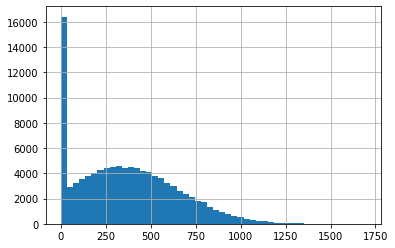

In [9]:
internet['mb_used'].hist(bins = 50)

There are 13747 users who didn't not use their data package in a specific month (out of 76051 row data set, 18% of the data). By looking at the histogram it looks like an outliar.. 
If we remove these rows, for users that didn't use call & messages on the same month we will not have anu data on them. but if they just didn't use the internet (maybe they don't have a smartphone..) I will still have these users in the merged data set that will combine the information about them, and the data sessions will be set to 0 anyway so removing these rows is ok. 

## Step 2. Data Preprocessing

In [10]:
#dropping rows for calls of 0 minutes
calls = calls[calls.duration != 0]

In [11]:
#dropping rows for data sessions of 0 mb
internet = internet[internet.mb_used != 0]

In [12]:
#calculating the number of calls made and minutes used per month
#add a column for the month the call was made
calls['call_date'] = pd.to_datetime(calls['call_date'] ,format = '%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month
#round up each call duration 
calls['duration'] = calls['duration'].apply(np.ceil)
display(calls.head())

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


In [13]:
#group by user id & month and calculation calls duration per user per month
calls_grouped = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()

display(calls_grouped.head())


,user_id,month,duration
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0


In [14]:
#add a column for the month the session was made
internet['session_date'] = pd.to_datetime(internet['session_date'] ,format = '%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month

display(internet.head())

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8


In [15]:
#group by user id & month and calculate the total sessions volume per user per month
internet_grouped = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
#change mb_used to gb_used and round up
internet_grouped['gb_used'] = (internet_grouped['mb_used']/1024).apply(np.ceil)
display(internet_grouped.head())

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0


In [16]:
#calculating the number of messagese sent per user per month
#add a column for the month the message was sent
mess['message_date'] = pd.to_datetime(mess['message_date'] ,format = '%Y-%m-%d')
mess['month'] = mess['message_date'].dt.month
display(mess.head())

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [17]:
#group by user id & month and calculate the number of messages per user per month
mess_grouped = mess.groupby(['user_id', 'month']).count().reset_index()
mess_grouped.drop('message_date', 1, inplace = True)
mess_grouped.columns = ['user_id', 'month', 'num_of_messages']

display(mess_grouped.head())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,user_id,month,num_of_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [18]:
#merge the users data (calls, internet use and messages) into one table
data_frames = [internet_grouped, calls_grouped, mess_grouped]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames).fillna(0)
display(df_merged.head())

,user_id,month,mb_used,gb_used,duration,num_of_messages
0,1000,12,1901.47,2.0,124.0,11.0
1,1001,8,6919.15,7.0,182.0,30.0
2,1001,9,13314.82,14.0,315.0,44.0
3,1001,10,22330.49,22.0,393.0,53.0
4,1001,11,18504.30,19.0,426.0,36.0


In [19]:
#merge with the users data
df_merged2= pd.merge(left = df_merged, 
                right = users[['user_id', 'city', 'plan']], how='outer',on=['user_id']).fillna(0)

display(df_merged2.head())

,user_id,month,mb_used,gb_used,duration,num_of_messages,city,plan
0,1000,12.0,1901.47,2.0,124.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,8.0,6919.15,7.0,182.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,9.0,13314.82,14.0,315.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,10.0,22330.49,22.0,393.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,11.0,18504.30,19.0,426.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf


In [20]:
display(plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [21]:
#creating a function to calculate the revenue per user
def revanue_calc(row):
    
    if row['plan'] == 'surf':
        basic = 20
    else:
        basic = 70
    
    if row['plan'] == 'surf':
        if row['gb_used'] > plans['mb_per_month_included'].iloc[0]/1024:
            internet = ((row['gb_used'] - (plans['mb_per_month_included'].iloc[0])/1024))* plans['usd_per_gb'].iloc[0]
        else:
            internet = 0
        if row['duration'] > plans['minutes_included'].iloc[0]:
            call = (row['duration'] - plans['minutes_included'].iloc[0])*plans['usd_per_minute'].iloc[0]
        else:
            call = 0
        if row['num_of_messages'] > plans['messages_included'].iloc[0]:
            messages = row['num_of_messages'] - plans['messages_included'].iloc[0]
        else:
            messages = 0
            
    else:
        if row['gb_used'] > plans['mb_per_month_included'].iloc[1]/1024:
            internet = ((row['gb_used'] - (plans['mb_per_month_included'].iloc[1])/1024))* plans['usd_per_gb'].iloc[1]
        else:
            internet = 0
        if row['duration'] > plans['minutes_included'].iloc[1]:
            call = (row['duration'] - plans['minutes_included'].iloc[1])*plans['usd_per_minute'].iloc[1]
        else:
            call = 0
        if row['num_of_messages'] > plans['messages_included'].iloc[1]:
            messages = row['num_of_messages'] - plans['messages_included'].iloc[1]
        else:
            messages = 0
            
        
    total_revanue = basic + internet + call + messages
    return total_revanue

In [22]:
#calculating the revanue per user
df_merged2['total_revanue']=df_merged2.apply(revanue_calc,axis=1)
display(df_merged2)

,user_id,month,mb_used,gb_used,duration,num_of_messages,city,plan,total_revanue
0,1000,12.0,1901.47,2.0,124.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.0
1,1001,8.0,6919.15,7.0,182.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.0
2,1001,9.0,13314.82,14.0,315.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.0
3,1001,10.0,22330.49,22.0,393.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,93.0
4,1001,11.0,18504.30,19.0,426.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.0
...,...,...,...,...,...,...,...,...,...
2298,1307,0.0,0.00,0.0,0.0,0.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,20.0
2299,1319,0.0,0.00,0.0,0.0,0.0,"Colorado Springs, CO MSA",surf,20.0
2300,1378,0.0,0.00,0.0,0.0,0.0,"Denver-Aurora-Lakewood, CO MSA",surf,20.0
2301,1463,0.0,0.00,0.0,0.0,0.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.0


We can see that we have rows with 0 value for mb_used, duration and number_of_messages this can happen, a month that you are away and not use your phone but you still pay the monthly rate per plan. 
Yet, we have rows with 0 value in the month column, not sure what does it mean, I'll look into it. 


In [23]:
df_merged2[df_merged2['month']== 0].count()

user_id            10
month              10
mb_used            10
gb_used            10
duration           10
num_of_messages    10
city               10
plan               10
total_revanue      10
dtype: int64

We have 10 rows with month = 0, we will drop these rows since we can't calculate any thing on a month 0 that doesn't exist...

In [24]:
df_merged2 = df_merged2[df_merged2['month'] != 0]
display(df_merged2)

,user_id,month,mb_used,gb_used,duration,num_of_messages,city,plan,total_revanue
0,1000,12.0,1901.47,2.0,124.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.00
1,1001,8.0,6919.15,7.0,182.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
2,1001,9.0,13314.82,14.0,315.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
3,1001,10.0,22330.49,22.0,393.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,93.00
4,1001,11.0,18504.30,19.0,426.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00
...,...,...,...,...,...,...,...,...,...
2288,1470,8.0,0.00,0.0,580.0,141.0,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",surf,113.40
2289,1470,9.0,0.00,0.0,471.0,130.0,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",surf,100.00
2290,1470,10.0,0.00,0.0,459.0,145.0,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",surf,115.00
2291,1470,11.0,0.00,0.0,632.0,156.0,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",surf,129.96


We should check if anything else = 0 and doesn't make sense to us. 

In [25]:
df_merged2.describe(include = 'all')

,user_id,month,mb_used,gb_used,duration,num_of_messages,city,plan,total_revanue
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293,2293,2293.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,73,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,377,1573,NaN
mean,1246.075883,9.172700,16764.397606,16.870475,429.283471,33.166594,NaN,NaN,69.017553
std,143.051927,2.496386,7967.237527,7.796174,236.320077,34.070085,NaN,NaN,51.489127
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,20.000000
25%,1122.000000,8.000000,12235.760000,12.000000,265.000000,3.000000,NaN,NaN,30.000000
50%,1245.000000,10.000000,16830.640000,17.000000,425.000000,26.000000,NaN,NaN,70.000000
75%,1368.000000,11.000000,20999.840000,21.000000,572.000000,51.000000,NaN,NaN,74.170000


The only rows left with 0 values are call duration, data sessions and messages sent which I believe can be the true stroy, so I will leave it as is. 

## Step 3. Data Analysis

In [26]:
#split the merged data frame into 2 - for each plan
df_surf = df_merged2[df_merged2['plan'] == 'surf']
df_ultimate = df_merged2[df_merged2['plan'] == 'ultimate']

In [27]:
#learn more about the merged data frame for 'surf' plan users
display(df_surf.describe())

,user_id,month,mb_used,gb_used,duration,num_of_messages,total_revanue
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,1242.755245,9.182454,16558.283490,16.670693,428.749523,31.159568,67.508741
std,139.227939,2.468199,8013.513327,7.847522,234.453150,33.566717,61.633949
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1120.000000,8.000000,11986.520000,12.000000,272.000000,3.000000,20.000000
50%,1245.000000,10.000000,16829.310000,17.000000,425.000000,24.000000,50.000000
75%,1358.000000,11.000000,20999.610000,21.000000,576.000000,47.000000,90.000000
max,1499.000000,12.000000,70931.590000,70.000000,1510.000000,266.000000,664.090000


In [28]:
#learn more about the merged data frame for 'ultimate' plan users
display(df_ultimate.describe())

,user_id,month,mb_used,gb_used,duration,num_of_messages,total_revanue
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,1253.330556,9.151389,17214.699694,17.306944,430.450000,37.551389,72.313889
std,150.915644,2.558495,7851.897435,7.670108,240.508762,34.767179,11.395108
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,70.000000
25%,1126.000000,8.000000,12666.955000,13.000000,260.000000,7.000000,70.000000
50%,1241.500000,10.000000,16858.340000,17.000000,424.000000,30.000000,70.000000
75%,1401.000000,11.000000,21014.527500,21.000000,565.250000,61.000000,70.000000
max,1497.000000,12.000000,46595.330000,46.000000,1369.000000,166.000000,182.000000


When looking at the data description, first we can see that the amount of users in the surf plan is almost twice the amount of the ultimate plan, which makes sense because there's a big difference in the plan fee (20 and 70) people will not rush into spending 70 $ as the basic plan fee.
It seems like users from the 'surf' plan which is suppose to be for users that spend less time on their phones are actually spending more (or the same).
The maximum value for messgaes, mb_used and duration of calls per month is actually higher in the 'surf' plan. The average value is similar for these columns in both plans. 
Also we can see that the mean values and median values for duration, mb_used and num_of_messages are pretty close so we will probably get normal distribution plots. 
I'll look in the histograms for each plan to see if we can desribe the users of each plan better.

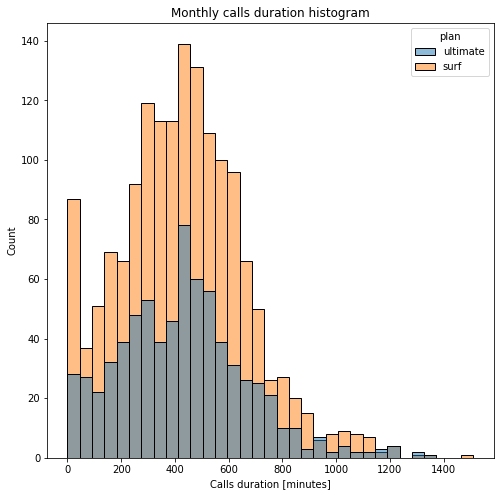

In [29]:
#plotting histogram
#calls duration
plt.figure(figsize=(8,8))
sns.histplot(df_merged2,x='duration',hue='plan')
plt.title('Monthly calls duration histogram')
plt.xlabel('Calls duration [minutes]')
plt.show()

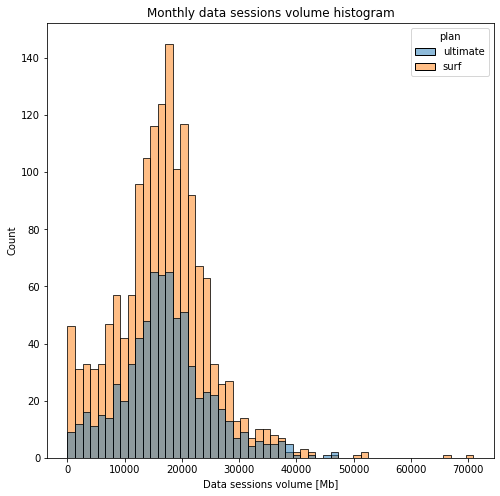

In [30]:
#plotting histogram 
#mb_used
plt.figure(figsize=(8,8))
sns.histplot(df_merged2,x='mb_used',hue='plan')
plt.title('Monthly data sessions volume histogram')
plt.xlabel('Data sessions volume [Mb]')
plt.show()

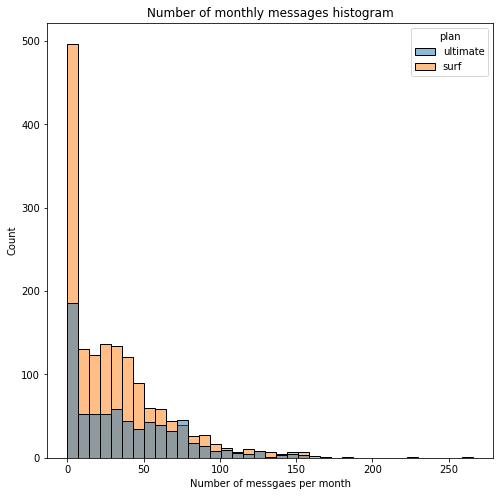

In [31]:
#plotting histogram for surf users data
#number of messages
plt.figure(figsize=(8,8))
sns.histplot(df_merged2,x='num_of_messages',hue='plan')
plt.title('Number of monthly messages histogram')
plt.xlabel('Number of messgaes per month')
plt.show()

In [32]:
#Calculating the variance
print('The variance of calls duration for Surf plan users is:' ,df_surf.duration.var())
print('The variance of calls duration for Ultimate plan users is:' ,df_ultimate.duration.var())
print('The variance of number of messages for Surf plan users is:' ,df_surf.num_of_messages.var())
print('The variance of  number of messages for Ultimate plan users is:' ,df_ultimate.num_of_messages.var())
print('The variance of data sessions for Surf plan users is:' ,df_surf.mb_used.var())
print('The variance of  data sessions for Ultimate plan users is:' ,df_ultimate.mb_used.var())

The variance of calls duration for Surf plan users is: 54968.27946065038
The variance of calls duration for Ultimate plan users is: 57844.46481223922
The variance of number of messages for Surf plan users is: 1126.7245219504068
The variance of  number of messages for Ultimate plan users is: 1208.7567435481378
The variance of data sessions for Surf plan users is: 64216395.838027954
The variance of  data sessions for Ultimate plan users is: 61652293.32385832


When looking at the histograms of the calls duration, messages and data sessions we can see that both plans have similar distribution.
We have less ultimate users so the count is smaller.
This may raise a questions that maybe if their phone usage is similar which of the plans is better fitted for their use? Maybe it's something in the middle...

The histogram for number of message can clearly show that no one ( in both plans) is even close to reaching the 'Ultimate' plan limit of 1000 texts. Same for call duration, the highest we get is hald of the limit of the Ultimate plan limit for call duration. 
The most used thing for both plans users is the internet, even some of the calls we make today are using the data volume and not the call duration minutes (on Whatsapp, Zoom, facetime etc') and also messages can be sent throught the internet and not through the regular texts in the pre paid plan (on Whatsapp, facebook messanger, etc'). The telecom company should invest on enlarging the data volume offered and minimizing the calls but mostly the messages. 
The Ultimate plan can be adjusted and maybe this way we can lower it's basic fee to draw more clients. 

## Step 4. Test the hypotheses

I will test the hypotheses that the average revenue from users of Ultimate and Surf calling plans differs.

The Null hypotheses will be that the average revanue is the same, I will use alpha = 0.05 which is the standard choice. 

The alternative hypothesis will be that the average revanue for the Ultimate and Surf plans are different.  

I will use two sided t-test. first I will run a levene test to check wether these two groups have equal variance or not so the t - test will be more accurate.  

In [33]:
#first review of the mean revanue for each group
df_merged2.groupby(['plan'])['total_revanue'].mean()

plan
surf        67.508741
ultimate    72.313889
Name: total_revanue, dtype: float64

We can see there is a difference in the mean revanue between the groups, let's make sure it's statistically proven.

In [34]:
# devide the data to 2 groups with total_revanue column only
surf_rev = df_surf['total_revanue']
ultimate_rev = df_ultimate['total_revanue']

In [35]:
#create a function to check for equal variance and perform t-test
def t_test(sample1,sample2,alpha=0.05):
    p_value_levene=stats.levene(sample1, sample2).pvalue.astype(int)
    if p_value_levene<alpha:
        equal_v=False
    else:
        equal_v=True
    p_value=stats.ttest_ind(sample1, sample2,nan_policy='omit',equal_var=equal_v).pvalue.astype(int)
    if p_value<alpha:
        print('Reject H0: average of sample1 is not equal to average of sample2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample1 \
  and sample2 are not the same") 

In [36]:
#use the function to perform a t-test on the mean total_revanue of each plan group
t_test(surf_rev, ultimate_rev)

Reject H0: average of sample1 is not equal to average of sample2


As we suspected, we can reject the null hypothsis - the mean revanue of users in the surf plan is different than the mean revenue of the users in the ultimate plan. 

Now I will test the hypotheses that the average revenue from users who live in the NY-NJ region and users from other regions differs.

The Null hypothesis will be that the average revanue is the same, I will use alpha = 0.05 which is the standard choice. 

The alternative hypothesis will be that the average revanue from users in the NY-NJ region is defferent than users from other regions. 

I will use two sided t-test. first I will run a levene test to check wether these two groups have equal variance or not so the t - test will be more accurate. 

In [37]:
# devide the data to 2 groups: NY-NJ region and other regions

NYNJ_reg = df_merged2[df_merged2['city'].str.contains("NY" or "NJ")]
display(NYNJ_reg.head())
other_reg = df_merged2[~df_merged2['city'].str.contains("NY" or "NJ")]
display(other_reg.head())

,user_id,month,mb_used,gb_used,duration,num_of_messages,city,plan,total_revanue
56,1014,11.0,1175.59,2.0,163.0,9.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20.00
57,1014,12.0,7792.41,8.0,1114.0,64.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,52.42
75,1022,5.0,4908.08,5.0,302.0,0.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20.00
76,1022,6.0,23436.48,23.0,490.0,0.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,100.00
77,1022,7.0,9933.15,10.0,475.0,0.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20.00


,user_id,month,mb_used,gb_used,duration,num_of_messages,city,plan,total_revanue
0,1000,12.0,1901.47,2.0,124.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.0
1,1001,8.0,6919.15,7.0,182.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.0
2,1001,9.0,13314.82,14.0,315.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.0
3,1001,10.0,22330.49,22.0,393.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,93.0
4,1001,11.0,18504.30,19.0,426.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.0


In [38]:
#look into the mean of revanue for each group of regions
print(NYNJ_reg['total_revanue'].mean())
print(other_reg['total_revanue'].mean())

64.92110837438423
69.89892951775305


There is a difference bewtween the groups but I'm not sure if it's considered to be significant. we will perform a t-test again. 

In [39]:
#first create samples of the data
NYNJ_rev = NYNJ_reg['total_revanue']
other_rev = other_reg['total_revanue']

In [40]:
t_test(NYNJ_rev, other_rev)

Reject H0: average of sample1 is not equal to average of sample2


As we suspected again, we can reject the null hypothsis - the mean revanue of users in the NY-NJ region is different than the mean revenue of the users in other regions. 

## Conclusions

In the project I received data on 500 Megaline clients: who the clients are, where they're from, which plan they use (surf or Ultimate), the number of calls they made, data sessions they used and text messages they sent in 2018. 
The purporse of this project was to analyze clients' behavior and determine which prepaid plan out of the two brings in more revenue.

At first we looked at the data received, there were no missing values, we didn't convert any data type and the only thing noteable was the calls with duration of 0 which might have been a really quick call that in the server was saved as 0 minutes, I droped these rows since a call duration will not add to my monthly total calculations in the next step. 

In order to prepare the data for analysis I calculated the monthly number of massages each user sent, the monthly call duration each user made (by summing all the call after I rounded up the seconds to minutes of each seperate call) and the total data sessions used (by summing up the total per month and then rounding up the Mb to Gb). 

I created a function for calculating the total revanue for each user depending on the basic plan fee and the additional fees for calls, texts and data which is over the included in the plan. 

I merged all the data I want to analyze into one table and started the investigation. 

I plotted histograms for call duration, number of messages and data used by the users of each plan and learned that the data is distributed pretty similarly, also when looking at the data description tables the numbers seems pretty similar. The majority of the users of both plans use their phone pretty much the same amount of time. 

In order to determine whether the average revanue in both plan groups is the same or not, I performed a two sided t-test and I learned that the average revanue differs between the groups. The average is higher for the Ultimate group, mostly because the basic fee is much high. Though it looks like most of the clients are of the surf plan and since the revanue is not only the average per month but also the amount of customers maybe it's worth to lower a bit the basic fee of the Ultimate group so it will convince more people to join this plan. 

As for the difference between clients in the NY-NJ region and other regions, I thought the difference in the average value is not significatant but again, using a t-test we can see that the averages differ and clients in other regions make a higher revanue for Megaline. 